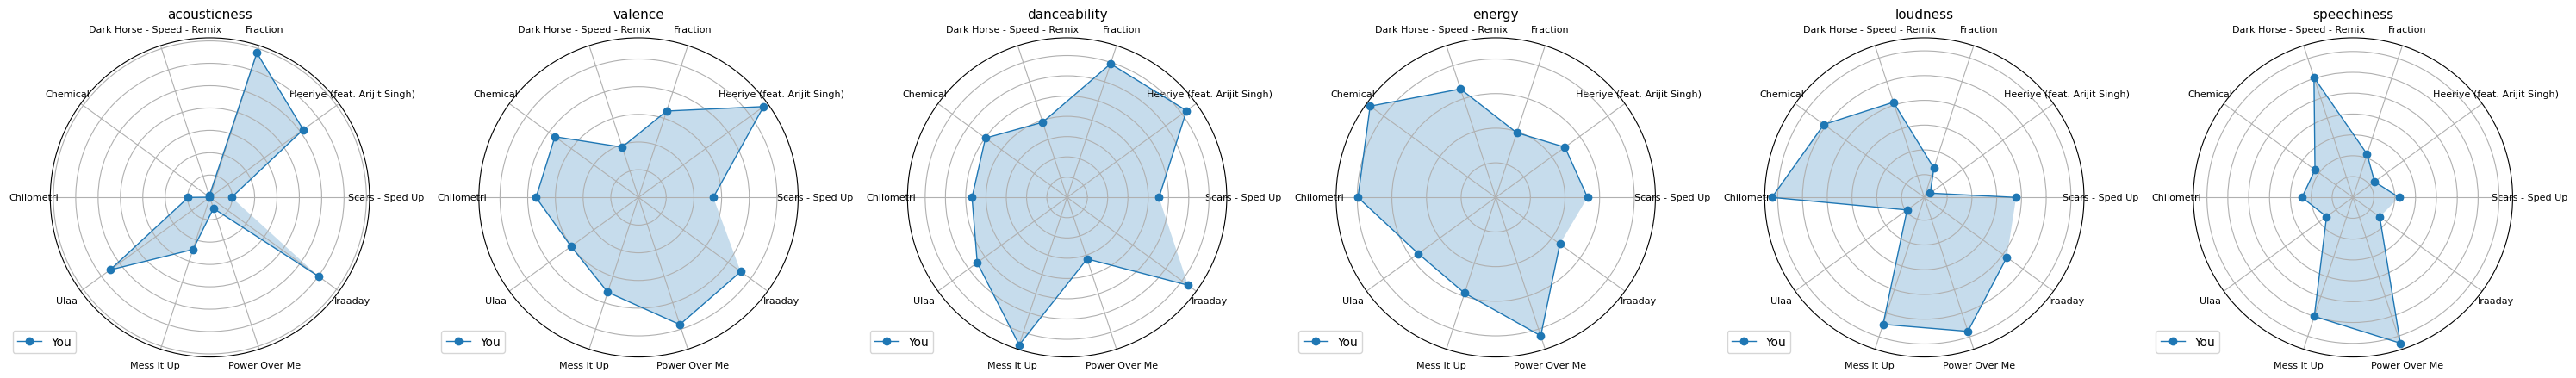

In [4]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define your Spotify API credentials
client_id = '<your-client-id>'
client_secret = '<your-client-secret>'
redirect_uri = 'http://localhost:3000/callback'

# Initialize the Spotipy client with OAuth2 authorization
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri, scope='user-library-read user-top-read'))

# Function to get top tracks and their audio features
def get_top_tracks_and_features(username):
    top_tracks = sp.current_user_top_tracks(time_range='medium_term', limit=10)
    track_uris = [track['uri'] for track in top_tracks['items']]
    
    # Get the names of the tracks
    track_names = [track['name'] for track in top_tracks['items']]
    
    # Get the audio features
    track_features = sp.audio_features(track_uris)
    
    return track_names, track_features

# Your username (your Spotify profile)
your_username = '<your-username>'
your_track_names, your_features = get_top_tracks_and_features(your_username)

# Friend's username (your friend's Spotify profile)
friend_username = '<friend username>'
friend_track_names, friend_features = get_top_tracks_and_features(friend_username)

# Create dataframes for your and your friend's top tracks and features
your_features_df = pd.DataFrame(your_features)
friend_features_df = pd.DataFrame(friend_features)
#print(your_features_df)

# Select the audio features you want to compare
audio_features = ['acousticness', 'valence', 'danceability', 'energy', 'loudness', 'speechiness']

# Create radar plots to compare audio features
plt.figure(figsize=(30, 50))

for idx, feature in enumerate(audio_features):
    ax = plt.subplot(1, len(audio_features), idx + 1, projection='polar')
    
    your_values = your_features_df[feature]
    friend_values = friend_features_df[feature]
    
    categories = your_track_names[:len(your_values)]  # Use the track names as categories
    N = len(categories)
    
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    
    ax.plot(angles, your_values, 'o-', linewidth=1, label='You')
    ax.fill(angles, your_values, alpha=0.25)
    
    #ax.plot(angles, friend_values, 'o-', linewidth=1, label='Friend')
    #ax.fill(angles, friend_values, alpha=0.25)
    
    ax.set_xticks(angles, labels=categories, size=8)
    ax.set_yticklabels([])
    ax.set_title(f'{feature}', size=11)
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.tight_layout()
plt.show()


In [2]:
friend_track_names = get_top_tracks_and_features(your_username)[0]  # Get the track names

# Access a specific track name (e.g., the first track)
first_track_name = friend_track_names[0]
print("First track name:", first_track_name)

# Access all track names
for track_name in friend_track_names:
    print(track_name)


First track name: Scars - Sped Up
Scars - Sped Up
Heeriye (feat. Arijit Singh)
Fraction
Dark Horse - Speed - Remix
Chemical
Chilometri
Ulaa
Mess It Up
Power Over Me
Iraaday
